In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

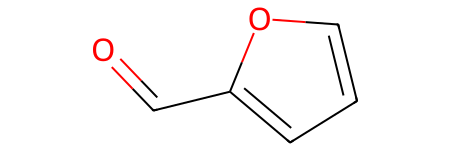

In [3]:
aldehyde_smiles = "C1=COC(=C1)C=O"
dp0 = Chem.MolFromSmiles(aldehyde_smiles)
dp0

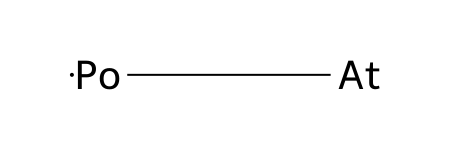

In [4]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (vinyl)

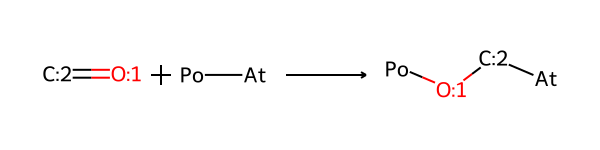

In [5]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[O:1]=[C:2].[Po]-[At]>>[Po]-[O:1]-[C:2]-[At]"
)
initiation

Num products: 1


[10:10:17] reactant 1 has no mapped atoms.


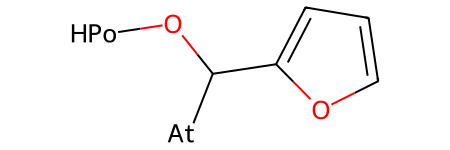

In [6]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((dp0, helper))[0][0]
print("Num products:", len(initiation.RunReactants((dp0, helper))))
dp1

### Propagation reaction (should work for everything)

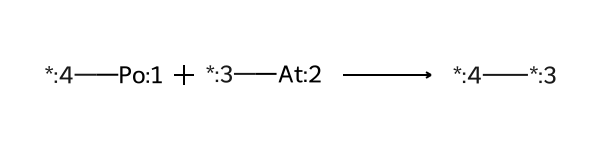

In [7]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

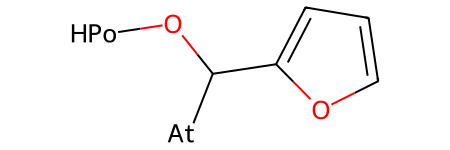

In [8]:
dp1

In [9]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
assert(len(products) == 1)
products

[10:10:17] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


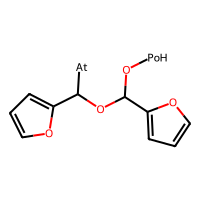

In [10]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=1)

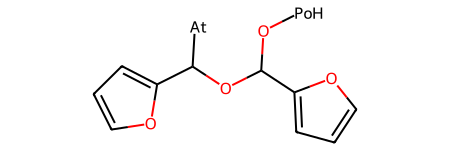

In [11]:
dp2 = products[0]
dp2

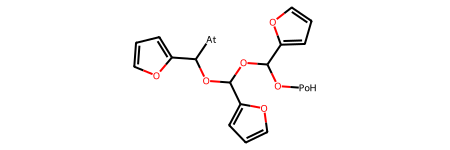

In [12]:
products = [item[0] for item in prop.RunReactants((dp1, dp2))]
assert(len(products) == 1)
dp3 = products[0]
dp3

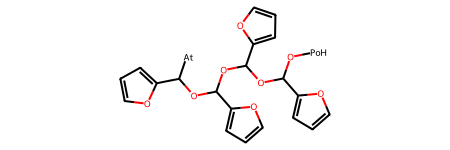

In [13]:
products = [item[0] for item in prop.RunReactants((dp1, dp3))]
assert(len(products) == 1)
dp4 = products[0]
dp4

### Replace end groups with CH3s

In [14]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [15]:
replaceAt.RunReactantInPlace(dp4)

True

In [16]:
replacePo.RunReactantInPlace(dp4)

True

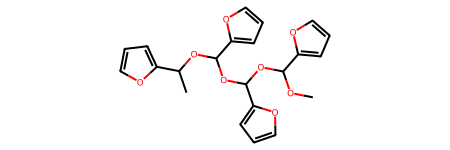

In [17]:
dp4